In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from gendis.genetic import GeneticExtractor

/home/samirj/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [5]:
train_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [5]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
len(train_df)

7352

In [7]:
train_sample = train_df.sample(n=1000)

In [8]:
X_train = train_sample.drop('Activity', axis=1)
y_train = train_sample['Activity']
X_test = test_df.drop('Activity', axis=1)
y_test = test_df['Activity']

In [9]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [10]:
args = {
    "population_size": 50, 
    "iterations": 25,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 10, 
    "max_len": 50,
    "n_jobs": multiprocessing.cpu_count(),
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'population_size': 50,
 'iterations': 25,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 10,
 'n_jobs': 12,
 'normed': False,
 'max_len': 50,
 'max_shaps': None,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'fitness': <function gendis.fitness.logloss_fitness(X, y, shapelets, cache=None, verbose=False)>,
 'label_mapping': {},
 'shapelets': [],
 '_min_length': 0}

In [16]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.6457		0.185		-0.316467	123.5157
2		-0.5461		0.14		-0.316467	235.533
3		-0.4769		0.097		-0.31433	213.0536
4		-0.4106		0.06		-0.31433	251.3677
5		-0.4129		0.077		-0.31433	262.2431
6		-0.3905		0.062		-0.31433	286.1655
7		-0.3707		0.021		-0.31433	293.7146
8		-0.367		0.027		-0.31433	292.1029
9		-0.3604		0.017		-0.31433	329.5318
10		-0.3503		0.024		-0.31433	271.8072
11		-0.3384		0.029		-0.308813	325.606
12		-0.3248		0.019		-0.305164	265.8343
13		-0.3272		0.024		-0.303307	324.844
14		-0.3178		0.012		-0.302167	332.6905
15		-0.3109		0.009		-0.302127	251.8085
16		-0.3135		0.019		-0.297583	196.8347
17		-0.3032		0.008		-0.292481	127.9195
18		-0.2988		0.006		-0.291689	189.187
19		-0.2972		0.006		-0.284701	162.205
20		-0.295		0.01		-0.282577	149.1439
21		-0.291		0.008		-0.280119	152.2338
22		-0.2914		0.008		-0.27414	216.8231
23		-0.2882		0.016		-0.27414	146.407
24		-0.2845		0.015		-0.270894	177.1213
25		-0.2794		0.01		-0.265891	216.7146
CPU times: user 33min 53s, sys: 6

In [17]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 6min 13s, sys: 348 ms, total: 6min 14s
Wall time: 6min 13s


In [18]:
%%time
lr = LogisticRegression()
lr.fit(distances_train, y_train)
acc = accuracy_score(y_test, lr.predict(distances_test))
print(f'Accuracy = {acc}')

Accuracy = 0.8456057007125891
CPU times: user 60.9 ms, sys: 32 ms, total: 92.9 ms
Wall time: 55.8 ms


In [20]:
for shpl in gendis.shapelets:
    print(len(shpl))

35
42
42
4
6
42
7
42
42
38
4
42
11
4
42
42
42
42
42
42
42
15
46
42
42
42
42
31
42


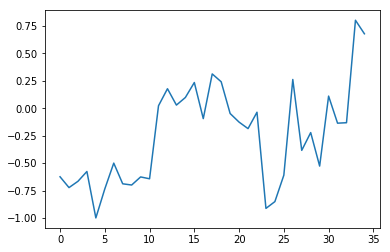

In [23]:
plt.plot(gendis.shapelets[0])

In [24]:
dists = pd.DataFrame(distances_train)
dists.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.541253,2.542433,2.601292,0.257374,0.407977,2.276797,0.395810,2.769978,2.412167,2.422153,...,2.217513,2.467201,0.771609,2.084410,2.008302,2.942171,0.884029,2.991471,2.060133,2.330390
std,0.579617,0.828882,0.854609,0.108164,0.162156,0.535859,0.075719,0.763963,1.023779,0.878407,...,0.580119,0.879829,0.584035,0.825303,0.949043,0.590778,0.290676,1.037562,0.573956,0.850424
min,0.000000,0.000000,0.000000,0.032029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071136,0.000000,0.000000,0.000000,0.446526,0.000000,0.000000,0.000000
25%,2.085362,1.745630,1.725703,0.174935,0.264628,1.876316,0.347217,2.262299,1.408287,1.539827,...,1.785440,1.638494,0.358924,1.478265,1.065870,2.834334,0.750758,1.973623,1.517372,1.716292
50%,2.800103,2.666614,2.839050,0.249662,0.385744,2.520629,0.395413,2.661130,2.210478,2.994205,...,2.258519,2.859989,0.531129,1.887183,1.881287,3.095494,0.888623,3.681075,2.159223,2.096951
75%,2.988617,3.314095,3.440605,0.339380,0.548569,2.661030,0.444744,3.189232,3.430511,3.226354,...,2.739193,3.297501,1.060448,2.567500,2.978272,3.281934,0.928407,3.944674,2.587960,2.756659
max,3.601126,3.874470,3.947611,0.555566,0.795243,3.883535,0.698804,4.541286,4.204435,3.652003,...,4.248245,3.604356,2.207491,4.268721,5.074735,4.519351,5.402200,4.210988,3.007332,4.371811


### Persistence of results

In [35]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = f'./{ts}/'
os.makedirs(ts)

dists.to_csv(f'{folder}/dist_matrix.csv', header=False, index=False)
dists.describe().to_csv(f'{folder}/dist_matrix_stats.csv')

with open(f'{folder}/gendis.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)